In [60]:
import numpy as np
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import pickle
from PIL import Image
import matplotlib.image as mpimg
import seaborn as sns

In [61]:
from google.colab import drive
drive.mount('/content/drive')
img = Image.open('/content/drive/MyDrive/major_project/gr_img.bmp')
img_array = np.asarray(img)
print(img_array[0][0][0])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
177


In [62]:
def ret_message():
  m = []
  for i in range(28):
    t = img_array[0][i][0]
    m.append(t)
  
  mbin = []
  for each in m:
    b = bin(each).replace("0b","")
    t = b[::-1]
    while len(t) < 8:
      t += '0'
    b = t[::-1]
    mbin.append(b)

  inp_message = []
  for i in range(0,28,2):
    t = mbin[i]+mbin[i+1]
    inp_message.append(t)
  return inp_message

In [63]:
INP_M = ret_message()
inp_lst = ''
for each in INP_M:
  inp_lst = inp_lst + each
print(inp_lst)

10110001101100001010111010101011101010001010010110100011101000101010101010101000101001011010001010100001101000101010001110100100101011101011000110110100101101111011101010111010101110101011100110100000100110001000100001110000


In [64]:
ret_message()

['1011000110110000',
 '1010111010101011',
 '1010100010100101',
 '1010001110100010',
 '1010101010101000',
 '1010010110100010',
 '1010000110100010',
 '1010001110100100',
 '1010111010110001',
 '1011010010110111',
 '1011101010111010',
 '1011101010111001',
 '1010000010011000',
 '1000100001110000']

In [65]:
def MessageDec():
  M_dec = []
  mw = ret_message()
  for each in mw:
    b = each.lstrip('0')
    dm_num = int(b, 2)
    M_dec.append(dm_num)
  return M_dec

In [66]:
def gen_prng1(x, y, size):

  a1 = -0.6; a2 = -0.1;
  a3 = 1.1; a4 = 0.2;
  a5 = -0.8; a6 = 0.6
  a7 = -0.7; a8 = 0.7
  a9 = 0.7; a10 = 0.3
  a11 = 0.6; a12 = 0.9
  rseq = []
  for i in range(0,size):
    x_temp = y_temp = 0
    
    x_temp = a1+a2*x+a3*x*x+a4*x*y+a5*y+a6*y*y
    y_temp = a7+a8*x+a9*x*x+a10*x*y+a11*y+a12*y*y
    #print("\nchaotic values:",'\nx=',x_new,"",'\ny=',y_new)
    prn_x = (math.floor(x_temp*(math.pow(2,35)-1)))%256
    prn_y = (math.floor(y_temp*(math.pow(2,35)-1)))%256
    x = x_temp
    y = y_temp
    bprn_x = bin(prn_x).replace("0b","")
    t_x = bprn_x[::-1]
    while len(t_x) < 8:
      t_x += '0'
    bprn_x = t_x[::-1]
    #print(bprn_x)

    bprn_y = bin(prn_y).replace("0b","")
    t_y = bprn_y[::-1]
    while len(t_y) < 8:
      t_y += '0'
    bprn_y = t_y[::-1]
    #print(bprn_y)

    seq = bprn_x + bprn_y
    rseq.append(seq)
  return rseq


In [67]:
def gen_prng2(x, y, size):

  a1 = -1.0; a2 = 0.9;
  a3 = 0.4; a4 = -0.2;
  a5 = -0.6; a6 = -0.5
  a7 = 0.4; a8 = 0.7
  a9 = 0.3; a10 = -0.5
  a11 = 0.7; a12 = -0.8
  rseq = []
  for i in range(0,size):
    x_temp = y_temp = 0
    
    x_temp = a1+a2*x+a3*x*x+a4*x*y+a5*y+a6*y*y
    y_temp = a7+a8*x+a9*x*x+a10*x*y+a11*y+a12*y*y
    #print("\nchaotic values:",'\nx=',x_new,"",'\ny=',y_new)
    prn_x = (math.floor(x_temp*(math.pow(2,35)-1)))%256
    prn_y = (math.floor(y_temp*(math.pow(2,35)-1)))%256
    x = x_temp
    y = y_temp
    bprn_x = bin(prn_x).replace("0b","")
    t_x = bprn_x[::-1]
    while len(t_x) < 8:
      t_x += '0'
    bprn_x = t_x[::-1]
    #print(bprn_x)

    bprn_y = bin(prn_y).replace("0b","")
    t_y = bprn_y[::-1]
    while len(t_y) < 8:
      t_y += '0'
    bprn_y = t_y[::-1]
    #print(bprn_y)

    seq = bprn_x + bprn_y
    rseq.append(seq)
  return rseq


In [68]:
def gen_prng3(x, y, size):

  a1 = 0.8; a2 = 1.0;
  a3 = -1.2; a4 = -1.0;
  a5 = 1.1; a6 = -0.9
  a7 = 0.4; a8 = -0.4
  a9 = -0.6; a10 = -0.2
  a11 = -0.5; a12 = -0.7
  rseq = []
  for i in range(0,size):
    x_temp = y_temp = 0
    
    x_temp = a1+a2*x+a3*x*x+a4*x*y+a5*y+a6*y*y
    y_temp = a7+a8*x+a9*x*x+a10*x*y+a11*y+a12*y*y
    #print("\nchaotic values:",'\nx=',x_new,"",'\ny=',y_new)
    prn_x = (math.floor(x_temp*(math.pow(2,35)-1)))%256
    prn_y = (math.floor(y_temp*(math.pow(2,35)-1)))%256
    x = x_temp
    y = y_temp
    bprn_x = bin(prn_x).replace("0b","")
    t_x = bprn_x[::-1]
    while len(t_x) < 8:
      t_x += '0'
    bprn_x = t_x[::-1]
    #print(bprn_x)

    bprn_y = bin(prn_y).replace("0b","")
    t_y = bprn_y[::-1]
    while len(t_y) < 8:
      t_y += '0'
    bprn_y = t_y[::-1]
    #print(bprn_y)

    seq = bprn_x + bprn_y
    rseq.append(seq)
  return rseq


In [69]:
def gen_prng4(x, y, size):

  a1 = -0.6; a2 = -0.4;
  a3 = -0.4; a4 = -0.8;
  a5 = 0.7; a6 = 0.3
  a7 = -0.4; a8 = 0.4
  a9 = 0.5; a10 = 0.5
  a11 = 0.8; a12 = -0.1
  rseq = []
  for i in range(0,size):
    x_temp = y_temp = 0
    
    x_temp = a1+a2*x+a3*x*x+a4*x*y+a5*y+a6*y*y
    y_temp = a7+a8*x+a9*x*x+a10*x*y+a11*y+a12*y*y
    #print("\nchaotic values:",'\nx=',x_new,"",'\ny=',y_new)
    prn_x = (math.floor(x_temp*(math.pow(2,35)-1)))%256
    prn_y = (math.floor(y_temp*(math.pow(2,35)-1)))%256
    x = x_temp
    y = y_temp
    bprn_x = bin(prn_x).replace("0b","")
    t_x = bprn_x[::-1]
    while len(t_x) < 8:
      t_x += '0'
    bprn_x = t_x[::-1]
    #print(bprn_x)

    bprn_y = bin(prn_y).replace("0b","")
    t_y = bprn_y[::-1]
    while len(t_y) < 8:
      t_y += '0'
    bprn_y = t_y[::-1]
    #print(bprn_y)

    seq = bprn_x + bprn_y
    rseq.append(seq)
  return rseq


In [70]:
def TwoD_Map1(x1,y1,size1):
 
  Z_t = []
  bin_rndm_seq = gen_prng1(x1,y1, size1)
  print(bin_rndm_seq)
  for each in bin_rndm_seq:
    b = each.lstrip('0')
    t = int(b, 2)
    Z_t.append(t)
  return Z_t

In [71]:
def TwoD_Map2(x1,y1,size1):
 
  Z_t = []
  bin_rndm_seq = gen_prng2(x1,y1, size1)
  print(bin_rndm_seq)
  for each in bin_rndm_seq:
    b = each.lstrip('0')
    t = int(b, 2)
    Z_t.append(t)
  return Z_t

In [72]:
def TwoD_Map3(x1,y1,size1):
 
  Z_t = []
  bin_rndm_seq = gen_prng3(x1,y1, size1)
  print(bin_rndm_seq)
  for each in bin_rndm_seq:
    b = each.lstrip('0')
    t = int(b, 2)
    Z_t.append(t)
  return Z_t

In [73]:
def TwoD_Map4(x1,y1,size1):
 
  Z_t = []
  bin_rndm_seq = gen_prng4(x1,y1, size1)
  print(bin_rndm_seq)
  for each in bin_rndm_seq:
    b = each.lstrip('0')
    t = int(b, 2)
    Z_t.append(t)
  return Z_t

In [74]:
def cal_digest1():
  h = [0,0,0,0,0,0,0]
  Z = TwoD_Map1(0.1,0.2,14)
  print(Z)

  M = MessageDec()
  for i in range(0,7):
    M1 = M[2*i-1]
    M2 = M[2*i]
    here = 2*i-1
    next = here+1
    for j in range(0,7):
      K1 = Z[here]
      K2 = Z[next]
      P1 = M1^K1
      P2 = M2^K2
      if j == 0:
        h[j] = (P1*P2) % 0x10001
      else:
        h[j] ^= (P1*P2) % 0x10001
      here += 2; here %= 14
      next += 2; next %= 14
  return h

In [75]:
def cal_digest2():
  h = [0,0,0,0,0,0,0]
  Z = TwoD_Map2(0.1,0.2,14)
  print(Z)

  M = MessageDec()
  for i in range(0,7):
    M1 = M[2*i-1]
    M2 = M[2*i]
    here = 2*i-1
    next = here+1
    for j in range(0,7):
      K1 = Z[here]
      K2 = Z[next]
      P1 = M1^K1
      P2 = M2^K2
      if j == 0:
        h[j] = (P1*P2) % 0x10001
      else:
        h[j] ^= (P1*P2) % 0x10001
      here += 2; here %= 14
      next += 2; next %= 14
  return h

In [76]:
def cal_digest3():
  h = [0,0,0,0,0,0,0]
  Z = TwoD_Map3(0.1,0.2,14)
  print(Z)

  M = MessageDec()
  for i in range(0,7):
    M1 = M[2*i-1]
    M2 = M[2*i]
    here = 2*i-1
    next = here+1
    for j in range(0,7):
      K1 = Z[here]
      K2 = Z[next]
      P1 = M1^K1
      P2 = M2^K2
      if j == 0:
        h[j] = (P1*P2) % 0x10001
      else:
        h[j] ^= (P1*P2) % 0x10001
      here += 2; here %= 14
      next += 2; next %= 14
  return h

In [77]:
def cal_digest4():
  h = [0,0,0,0,0,0,0]
  Z = TwoD_Map4(0.1,0.2,14)
  print(Z)

  M = MessageDec()
  for i in range(0,7):
    M1 = M[2*i-1]
    M2 = M[2*i]
    here = 2*i-1
    next = here+1
    for j in range(0,7):
      K1 = Z[here]
      K2 = Z[next]
      P1 = M1^K1
      P2 = M2^K2
      if j == 0:
        h[j] = (P1*P2) % 0x10001
      else:
        h[j] ^= (P1*P2) % 0x10001
      here += 2; here %= 14
      next += 2; next %= 14
  return h

In [78]:
digest1 = cal_digest1()
digest2 = cal_digest2()
digest3 = cal_digest3()
digest4 = cal_digest4()

['1101010101100100', '0011100100010011', '0011110011010001', '1101101100101011', '1101010110110101', '0111010011101100', '0110100111010011', '1110001111011011', '0110011000011111', '1001101111110100', '0110000000000111', '0111101010100001', '0011000000110101', '1101100100000010']
[54628, 14611, 15569, 56107, 54709, 29932, 27091, 58331, 26143, 39924, 24583, 31393, 12341, 55554]
['1001101010101111', '0001111000100100', '1110000010110000', '0010111100100100', '0011010111111100', '0100110011011111', '1011110110111110', '0001011111001110', '0100100101010001', '0001110111100110', '1101010000000000', '1000000001001011', '0011111011001110', '0010110111100100']
[39599, 7716, 57520, 12068, 13820, 19679, 48574, 6094, 18769, 7654, 54272, 32843, 16078, 11748]
['1101101010011101', '1100010000000011', '1010000000110100', '1111010000000011', '1110110000111110', '0001101101110011', '1000111101000100', '0110100001001111', '0001110100111010', '0000101000000101', '0001000101011000', '0110001000110100', '1

In [79]:
print(digest1)
print(digest2)
print(digest3)
print(digest4)

[58282, 59112, 9056, 13613, 47471, 59681, 3371]
[1239, 11337, 3918, 48240, 35124, 42440, 48453]
[16509, 9488, 974, 42884, 51266, 47811, 35962]
[60632, 36363, 58410, 12602, 36186, 22595, 3187]


In [80]:
d1 = ''
for each in digest1:
  b = bin(each).replace("0b","")
  t = b[::-1]
  while len(t) < 16:
    t += '0'
  b = t[::-1]
  d1 = d1 + b
print('Digest in Binary:')
print(d1)
d2 = ''
for each in digest2:
  b = bin(each).replace("0b","")
  t = b[::-1]
  while len(t) < 16:
    t += '0'
  b = t[::-1]
  d2 = d2 + b
print(d2)
d3 = ''
for each in digest3:
  b = bin(each).replace("0b","")
  t = b[::-1]
  while len(t) < 16:
    t += '0'
  b = t[::-1]
  d3 = d3 + b
print(d3)
d4 = ''
for each in digest4:
  b = bin(each).replace("0b","")
  t = b[::-1]
  while len(t) < 16:
    t += '0'
  b = t[::-1]
  d4 = d4 + b
print(d4)


Digest in Binary:
1110001110101010111001101110100000100011011000000011010100101101101110010110111111101001001000010000110100101011
0000010011010111001011000100100100001111010011101011110001110000100010010011010010100101110010001011110101000101
0100000001111101001001010001000000000011110011101010011110000100110010000100001010111010110000111000110001111010
1110110011011000100011100000101111100100001010100011000100111010100011010101101001011000010000110000110001110011


In [81]:
b = d1.lstrip('0')
num = int(b, 2)
dh1 = hex(num)
t = dh1
dh1 = '0x' + t[2:].zfill(28)
print('Digest in hexadecimal:')
print(dh1)
b = d2.lstrip('0')
num = int(b, 2)
dh2 = hex(num)
t = dh2
dh2 = '0x' + t[2:].zfill(28)
print(dh2)
b = d3.lstrip('0')
num = int(b, 2)
dh3 = hex(num)
t = dh3
dh3 = '0x' + t[2:].zfill(28)
print(dh3)
b = d4.lstrip('0')
num = int(b, 2)
dh4 = hex(num)
t = dh4
dh4 = '0x' + t[2:].zfill(28)
print(dh4)

Digest in hexadecimal:
0xe3aae6e82360352db96fe9210d2b
0x04d72c490f4ebc708934a5c8bd45
0x407d251003cea784c842bac38c7a
0xecd88e0be42a313a8d5a58430c73


In [82]:
rnum = random.randint(0,224)

In [83]:
def ret_digest():
  dword = ''
  for each in digest1:
    b = bin(each).replace("0b","")
    t = b[::-1]
    while len(t) < 16:
      t += '0'
    b = t[::-1]
    dword = dword + b

In [84]:
digest_val = ret_digest()

In [85]:
def gen_prng_(x, y, size):

  a1 = -0.6; a2 = -0.1;
  a3 = 1.1; a4 = 0.2;
  a5 = -0.8; a6 = 0.6
  a7 = -0.7; a8 = 0.7
  a9 = 0.7; a10 = 0.3
  a11 = 0.6; a12 = 0.9
  rseq = []
  for i in range(0,size):
    x_temp = y_temp = 0
    
    x_temp = a1+a2*x+a3*x*x+a4*x*y+a5*y+a6*y*y
    y_temp = a7+a8*x+a9*x*x+a10*x*y+a11*y+a12*y*y
    #print("\nchaotic values:",'\nx=',x_new,"",'\ny=',y_new)
    prn_x = (math.floor(x_temp*(math.pow(2,35)-1)))%256
    prn_y = (math.floor(y_temp*(math.pow(2,35)-1)))%256
    x = x_temp
    y = y_temp
    bprn_x = bin(prn_x).replace("0b","")
    t_x = bprn_x[::-1]
    while len(t_x) < 8:
      t_x += '0'
    bprn_x = t_x[::-1]
    #print(bprn_x)

    bprn_y = bin(prn_y).replace("0b","")
    t_y = bprn_y[::-1]
    while len(t_y) < 8:
      t_y += '0'
    bprn_y = t_y[::-1]
    #print(bprn_y)

    seq = bprn_x + bprn_y
    rseq.append(seq)
  return rseq


In [86]:
def TwoD_Map_(x1,y1,size1):
 
  Z_t = []
  bin_rndm_seq = gen_prng_(x1,y1, size1)
  
  for each in bin_rndm_seq:
    b = each.lstrip('0')
    t = int(b, 2)
    Z_t.append(t)
  return Z_t

In [87]:
def mess_dec(ms):
  mdec = []
  for each in ms:
    b = each.lstrip('0')
    dm_num = int(b, 2)
    mdec.append(dm_num)
  return mdec

In [88]:
def cal_dig(m):
  h = [0,0,0,0,0,0,0]
  Z = TwoD_Map_(0.1,0.2,14)
  
  M = m
  for i in range(0,7):
    M1 = M[2*i-1]
    M2 = M[2*i]
    here = 2*i-1
    next = here+1
    for j in range(0,7):
      K1 = Z[here]
      K2 = Z[next]
      P1 = M1^K1
      P2 = M2^K2
      if j == 0:
        h[j] = (P1*P2) % 0x10001
      else:
        h[j] ^= (P1*P2) % 0x10001
      here += 2; here %= 14
      next += 2; next %= 14
  return h

In [89]:
def dig_bin(dig):
  d1 = ''
  for each in dig:
    b = bin(each).replace("0b","")
    t = b[::-1]
    while len(t) < 16:
      t += '0'
    b = t[::-1]
    d1 = d1 + b
  return d1

In [90]:
def hamm_dist(s1, s2):
  i = 0
  count = 0
  while i < len(s1):
    if s1[i] != s2[i]:
      count += 1
    i += 1
  return count

In [91]:
# for N = 1024
changed_bit_number1 = [0 for i in range(0,1024)]
for i in range(0,1024):
  c = 0
  InpMessage = ret_message()
  messval1 = mess_dec(InpMessage)
  dig_val1 = cal_dig(messval1)
  digest_value1 = dig_bin(dig_val1)
  rnum = random.randint(0,208)
  #print(rnum)
  q = int(rnum / 16)
  r = rnum % 16
  #print(q)
  #print(r)
  qval = InpMessage[q]
  rval = qval[r]
  k = [0 for j in range(0,16)]
  j = 0
  for digit in qval:
    k[j] = digit
    j += 1
  #print(k)
  if k[r] == '0':
    k[r] = '1'
  else: k[r] = '0'
  #print(k)
  es = ''
  for each in k:
    es = es + each
  #print(InpMessage)
  InpMessage[q] = es
  #print(InpMessage)
  messval2 = mess_dec(InpMessage)
  dig_val2 = cal_dig(messval2)
  digest_value2 = dig_bin(dig_val2)
  #print(digest_value1)
  #print(digest_value2)
  c = hamm_dist(digest_value1, digest_value2)
  changed_bit_number1[i] = c


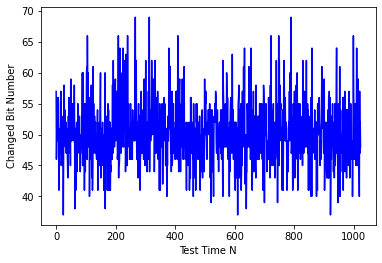

In [92]:
test_time_N1 = [i for i in range(0,1024)]
plt.xlabel("Test Time N")
plt.ylabel("Changed Bit Number")
plt.plot(test_time_N1,changed_bit_number1, color = 'b')

Text(3.674999999999997, 0.5, 'number of hits')

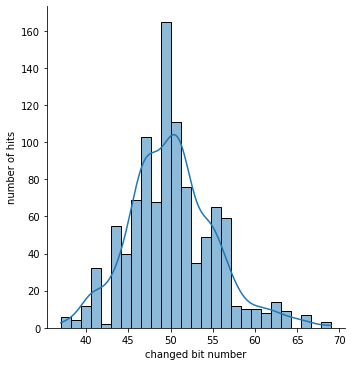

In [93]:
sns.displot(changed_bit_number1, kde = 'False')
plt.xlabel('changed bit number')
plt.ylabel('number of hits')

In [94]:
B1 = changed_bit_number1
B_min1 = min(B1)
B_max1 = max(B1)
print("Minimum Changed Bit Number : ", B_min1)
print("Maximum Changed Bit Number : ", B_max1)
N1 = len(B1)
B_bar1 = sum(B1)/N1
print("Mean Changed Bit Number : ",B_bar1)
P1 = B_bar1/112
P_percent1 = P1 * 100
print("Mean Changed Probability in Percentage : ",P_percent1)

a1 = [x - B_bar1 for x in B1]
a_square1 = [i * i for i in a1]
a_square_sum1 = sum(a_square1)
del_B1 = math.sqrt(a_square_sum1 / (N1-1))
print("Standard Variance of the Changed Bit Number : ",del_B1)

k1 = [x / 112 for x in B1]
k1 = [x - P1 for x in k1]
k1 = [x * x for x in k1]
k_sum1 = sum(k1)
del_P1 = math.sqrt(k_sum1 / (N1-1))
del_P_percent1 = del_P1 * 100
print("Standard Variance : ",del_P_percent1)

Minimum Changed Bit Number :  37
Maximum Changed Bit Number :  69
Mean Changed Bit Number :  50.2138671875
Mean Changed Probability in Percentage :  44.833809988839285
Standard Variance of the Changed Bit Number :  5.131140727664204
Standard Variance :  4.581375649700176


In [95]:
# for N = 224
changed_bit_number2 = [0 for i in range(0,224)]
for i in range(0,224):
  c = 0
  InpMessage = ret_message()
  messval1 = mess_dec(InpMessage)
  dig_val1 = cal_dig(messval1)
  digest_value1 = dig_bin(dig_val1)
  rnum = random.randint(0,208)
  #print(rnum)
  q = int(rnum / 16)
  r = rnum % 16
  #print(q)
  #print(r)
  qval = InpMessage[q]
  rval = qval[r]
  k = [0 for j in range(0,16)]
  j = 0
  for digit in qval:
    k[j] = digit
    j += 1
  #print(k)
  if k[r] == '0':
    k[r] = '1'
  else: k[r] = '0'
  #print(k)
  es = ''
  for each in k:
    es = es + each
  #print(InpMessage)
  InpMessage[q] = es
  #print(InpMessage)
  messval2 = mess_dec(InpMessage)
  dig_val2 = cal_dig(messval2)
  digest_value2 = dig_bin(dig_val2)
  #print(digest_value1)
  #print(digest_value2)
  c = hamm_dist(digest_value1, digest_value2)
  changed_bit_number2[i] = c

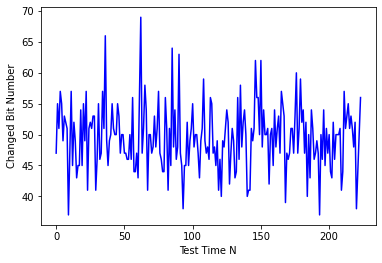

In [96]:
test_time_N2 = [i for i in range(0,224)]
plt.xlabel("Test Time N")
plt.ylabel("Changed Bit Number")
plt.plot(test_time_N2,changed_bit_number2, color = 'b')

Text(9.924999999999997, 0.5, 'number of hits')

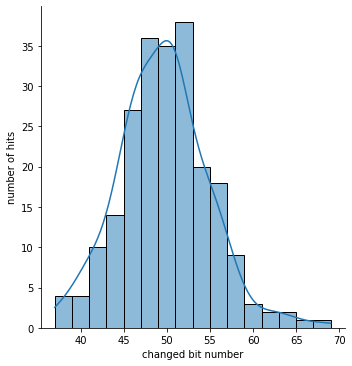

In [97]:
sns.displot(changed_bit_number2, kde = 'False')
plt.xlabel('changed bit number')
plt.ylabel('number of hits')

In [98]:
B2 = changed_bit_number2
B_min2 = min(B2)
B_max2 = max(B2)
print("Minimum Changed Bit Number : ", B_min2)
print("Maximum Changed Bit Number : ", B_max2)
N2 = len(B2)
B_bar2 = sum(B2)/N2
print("Mean Changed Bit Number : ",B_bar2)
P2 = B_bar2/112
P_percent2 = P2 * 100
print("Mean Changed Probability in Percentage : ",P_percent2)

a2 = [x - B_bar2 for x in B2]
a_square2 = [i * i for i in a2]
a_square_sum2 = sum(a_square2)
del_B2 = math.sqrt(a_square_sum2 / (N2-1))
print("Standard Variance of the Changed Bit Number : ",del_B2)

k2 = [x / 112 for x in B2]
k2 = [x - P2 for x in k2]
k2 = [x * x for x in k2]
k_sum2 = sum(k2)
del_P2 = math.sqrt(k_sum2 / (N2-1))
del_P_percent2 = del_P2 * 100
print("Standard Variance : ",del_P_percent2)

Minimum Changed Bit Number :  37
Maximum Changed Bit Number :  69
Mean Changed Bit Number :  49.535714285714285
Mean Changed Probability in Percentage :  44.22831632653061
Standard Variance of the Changed Bit Number :  5.205083013133092
Standard Variance :  4.64739554744026


In [99]:
# for N = 256
changed_bit_number3 = [0 for i in range(0,256)]
for i in range(0,256):
  c = 0
  InpMessage = ret_message()
  messval1 = mess_dec(InpMessage)
  dig_val1 = cal_dig(messval1)
  digest_value1 = dig_bin(dig_val1)
  rnum = random.randint(0,208)
  #print(rnum)
  q = int(rnum / 16)
  r = rnum % 16
  #print(q)
  #print(r)
  qval = InpMessage[q]
  rval = qval[r]
  k = [0 for j in range(0,16)]
  j = 0
  for digit in qval:
    k[j] = digit
    j += 1
  #print(k)
  if k[r] == '0':
    k[r] = '1'
  else: k[r] = '0'
  #print(k)
  es = ''
  for each in k:
    es = es + each
  #print(InpMessage)
  InpMessage[q] = es
  #print(InpMessage)
  messval2 = mess_dec(InpMessage)
  dig_val2 = cal_dig(messval2)
  digest_value2 = dig_bin(dig_val2)
  #print(digest_value1)
  #print(digest_value2)
  c = hamm_dist(digest_value1, digest_value2)
  changed_bit_number3[i] = c

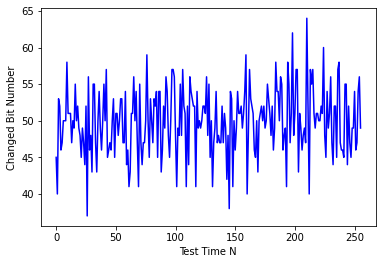

In [100]:
test_time_N256 = [i for i in range(0,256)]
plt.xlabel("Test Time N")
plt.ylabel("Changed Bit Number")
plt.plot(test_time_N256,changed_bit_number3, color = 'b')


Text(10.049999999999997, 0.5, 'number of hits')

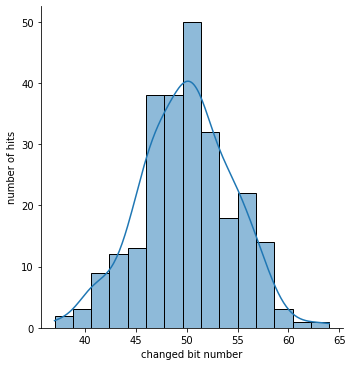

In [101]:
sns.displot(changed_bit_number3, kde = 'False')
plt.xlabel('changed bit number')
plt.ylabel('number of hits')

In [102]:
B3 = changed_bit_number3
B_min3 = min(B3)
B_max3 = max(B3)
print("Minimum Changed Bit Number : ", B_min3)
print("Maximum Changed Bit Number : ", B_max3)
N3 = len(B3)
B_bar3 = sum(B3)/N3
print("Mean Changed Bit Number : ",B_bar3)
P3 = B_bar3/112
P_percent3 = P3 * 100
print("Mean Changed Probability in Percentage : ",P_percent3)

a3 = [x - B_bar3 for x in B3]
a_square3 = [i * i for i in a3]
a_square_sum3 = sum(a_square3)
del_B3 = math.sqrt(a_square_sum3 / (N3-1))
print("Standard Variance of the Changed Bit Number : ",del_B3)

k3 = [x / 112 for x in B3]
k3 = [x - P3 for x in k3]
k3 = [x * x for x in k3]
k_sum3 = sum(k3)
del_P3 = math.sqrt(k_sum3 / (N3-1))
del_P_percent3 = del_P3 * 100
print("Standard Variance : ",del_P_percent3)

Minimum Changed Bit Number :  37
Maximum Changed Bit Number :  64
Mean Changed Bit Number :  49.9375
Mean Changed Probability in Percentage :  44.58705357142857
Standard Variance of the Changed Bit Number :  4.506639981357355
Standard Variance :  4.023785697640493


In [103]:
# for N = 512
changed_bit_number4 = [0 for i in range(0,512)]
for i in range(0,512):
  c = 0
  InpMessage = ret_message()
  messval1 = mess_dec(InpMessage)
  dig_val1 = cal_dig(messval1)
  digest_value1 = dig_bin(dig_val1)
  rnum = random.randint(0,208)
  #print(rnum)
  q = int(rnum / 16)
  r = rnum % 16
  #print(q)
  #print(r)
  qval = InpMessage[q]
  rval = qval[r]
  k = [0 for j in range(0,16)]
  j = 0
  for digit in qval:
    k[j] = digit
    j += 1
  #print(k)
  if k[r] == '0':
    k[r] = '1'
  else: k[r] = '0'
  #print(k)
  es = ''
  for each in k:
    es = es + each
  #print(InpMessage)
  InpMessage[q] = es
  #print(InpMessage)
  messval2 = mess_dec(InpMessage)
  dig_val2 = cal_dig(messval2)
  digest_value2 = dig_bin(dig_val2)
  #print(digest_value1)
  #print(digest_value2)
  c = hamm_dist(digest_value1, digest_value2)
  changed_bit_number4[i] = c

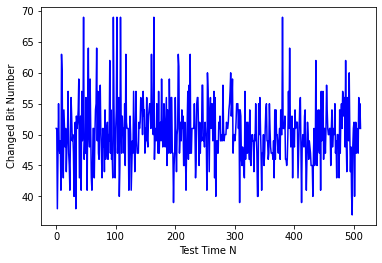

In [104]:
test_time_N4 = [i for i in range(0,512)]
plt.xlabel("Test Time N")
plt.ylabel("Changed Bit Number")
plt.plot(test_time_N4,changed_bit_number4, color = 'b')

Text(10.049999999999997, 0.5, 'number of hits')

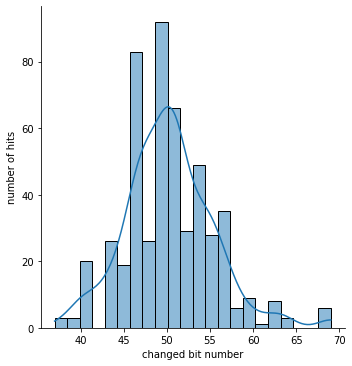

In [105]:
sns.displot(changed_bit_number4, kde = 'False')
plt.xlabel('changed bit number')
plt.ylabel('number of hits')

In [106]:
B4 = changed_bit_number4
B_min4 = min(B4)
B_max4 = max(B4)
print("Minimum Changed Bit Number : ", B_min4)
print("Maximum Changed Bit Number : ", B_max4)
N4 = len(B4)
B_bar4 = sum(B4)/N4
print("Mean Changed Bit Number : ",B_bar4)
P4 = B_bar4/112
P_percent4 = P4 * 100
print("Mean Changed Probability in Percentage : ",P_percent4)

a4 = [x - B_bar4 for x in B4]
a_square4 = [i * i for i in a4]
a_square_sum4 = sum(a_square4)
del_B4 = math.sqrt(a_square_sum4 / (N4-1))
print("Standard Variance of the Changed Bit Number : ",del_B4)

k4 = [x / 112 for x in B4]
k4 = [x - P4 for x in k4]
k4 = [x * x for x in k4]
k_sum4 = sum(k4)
del_P4 = math.sqrt(k_sum4 / (N4-1))
del_P_percent4 = del_P4 * 100
print("Standard Variance : ",del_P_percent4)

Minimum Changed Bit Number :  37
Maximum Changed Bit Number :  69
Mean Changed Bit Number :  50.3359375
Mean Changed Probability in Percentage :  44.942801339285715
Standard Variance of the Changed Bit Number :  5.1509919151918515
Standard Variance :  4.599099924278441


In [107]:
def gen_prng_1(x, y, size):

  a1 = -0.6; a2 = -0.1;
  a3 = 1.1; a4 = 0.2;
  a5 = -0.8; a6 = 0.6
  a7 = -0.7; a8 = 0.7
  a9 = 0.7; a10 = 0.3
  a11 = 0.6; a12 = 0.9
  rseq = []
  for i in range(0,size):
    x_temp = y_temp = 0
    
    x_temp = a1+a2*x+a3*x*x+a4*x*y+a5*y+a6*y*y
    y_temp = a7+a8*x+a9*x*x+a10*x*y+a11*y+a12*y*y
    #print("\nchaotic values:",'\nx=',x_new,"",'\ny=',y_new)
    prn_x = (math.floor(x_temp*(math.pow(2,35)-1)))%256
    prn_y = (math.floor(y_temp*(math.pow(2,35)-1)))%256
    x = x_temp
    y = y_temp
    bprn_x = bin(prn_x).replace("0b","")
    t_x = bprn_x[::-1]
    while len(t_x) < 8:
      t_x += '0'
    bprn_x = t_x[::-1]
    #print(bprn_x)

    bprn_y = bin(prn_y).replace("0b","")
    t_y = bprn_y[::-1]
    while len(t_y) < 8:
      t_y += '0'
    bprn_y = t_y[::-1]
    #print(bprn_y)

    seq = bprn_x + bprn_y
    rseq.append(seq)
  return rseq


In [108]:
def TwoD_Map_1(x1,y1,size1):
 
  Z_t = []
  bin_rndm_seq = gen_prng_(x1,y1, size1)
  
  for each in bin_rndm_seq:
    b = each.lstrip('0')
    t = int(b, 2)
    Z_t.append(t)
  return Z_t

In [109]:
def mess_dec1(ms):
  mdec = []
  for each in ms:
    b = each.lstrip('0')
    dm_num = int(b, 2)
    mdec.append(dm_num)
  return mdec

In [110]:
def cal_dig1(m):
  h = [0,0,0,0,0,0,0]
  Z = TwoD_Map_(0.1,0.2,14)
  
  M = m
  for i in range(0,7):
    M1 = M[2*i-1]
    M2 = M[2*i]
    here = 2*i-1
    next = here+1
    for j in range(0,7):
      K1 = Z[here]
      K2 = Z[next]
      P1 = M1^K1
      P2 = M2^K2
      if j == 0:
        h[j] = (P1*P2) % 0x10001
      else:
        h[j] ^= (P1*P2) % 0x10001
      here += 2; here %= 14
      next += 2; next %= 14
  return h

In [111]:
def dig_bin1(dig):
  d1 = ''
  for each in dig:
    b = bin(each).replace("0b","")
    t = b[::-1]
    while len(t) < 16:
      t += '0'
    b = t[::-1]
    d1 = d1 + b
  return d1

In [112]:
iarray = [0 for i in range(28)]

In [113]:
def ret_message_zero():
  m = []
  for each in iarray:
    #t = iarray[i]
    m.append(each)
  
  mbin = []
  for each in m:
    b = bin(each).replace("0b","")
    t = b[::-1]
    while len(t) < 8:
      t += '0'
    b = t[::-1]
    mbin.append(b)

  inp_message = []
  for i in range(0,28,2):
    t = mbin[i]+mbin[i+1]
    inp_message.append(t)
  return inp_message

In [114]:
ret_message_zero()

['0000000000000000',
 '0000000000000000',
 '0000000000000000',
 '0000000000000000',
 '0000000000000000',
 '0000000000000000',
 '0000000000000000',
 '0000000000000000',
 '0000000000000000',
 '0000000000000000',
 '0000000000000000',
 '0000000000000000',
 '0000000000000000',
 '0000000000000000']

In [115]:
# Message with all zeros i.e. 224-zeros
#messval1 = mess_dec1(InpMessage)
messval1 = [0 for i in range(14)]
print(messval1)
dig_val1 = cal_dig1(messval1)
digest_value1 = dig_bin1(dig_val1)
print(digest_value1)

b = digest_value1.lstrip('0')
num = int(b, 2)
dh1 = hex(num)
t = dh1
dh1 = '0x' + t[2:].zfill(28)
print('Digest in hexadecimal:')
print(dh1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0111110000111110001100111110001100110011111000110011001111100011001100111110001100110011111000110011001111100011
Digest in hexadecimal:
0x7c3e33e333e333e333e333e333e3


In [116]:
messval1 = [32768, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print(messval1)
dig_val1 = cal_dig1(messval1)
digest_value1 = dig_bin1(dig_val1)
print(digest_value1)

b_1 = digest_value1.lstrip('0')
num_1 = int(b_1, 2)
dh_1 = hex(num_1)
t_1 = dh_1
dh_1 = '0x' + t_1[2:].zfill(28)
print('Digest in hexadecimal:')
print(dh_1)

[32768, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0111110000111110101011110111110111000101100110010111011001101001110000011111011010000001111111011111000100110011
Digest in hexadecimal:
0x7c3eaf7dc5997669c1f681fdf133


In [117]:
messval2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 65, 0, 0, 0, 0]
print(messval2)
dig_val2 = cal_dig1(messval2)
digest_value2 = dig_bin1(dig_val2)
print(digest_value2)

b_2 = digest_value2.lstrip('0')
num_2 = int(b_2, 2)
dh_2 = hex(num_2)
t_2 = dh_2
dh_2 = '0x' + t_2[2:].zfill(28)
print('Digest in hexadecimal:')
print(dh_2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 65, 0, 0, 0, 0]
0111110000111110000101101110000001100010000100010011101101000011101010100101100000100110100011101101110110011110
Digest in hexadecimal:
0x7c3e16e062113b43aa58268edd9e


In [118]:
messval3 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32]
print(messval3)
dig_val3 = cal_dig1(messval3)
digest_value3 = dig_bin1(dig_val3)
print(digest_value3)

b_3 = digest_value3.lstrip('0')
num_3 = int(b_3, 2)
dh_3 = hex(num_3)
t_3 = dh_3
dh_3 = '0x' + t_3[2:].zfill(28)
print('Digest in hexadecimal:')
print(dh_3)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32]
0111110000111110010101000001101101111000011111000111011000001110000011110011011000110010100101110011101001111001
Digest in hexadecimal:
0x7c3e541b787c760e0f3632973a79
